In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import torch
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import shap
import nltk
from nltk.tokenize import sent_tokenize
from scipy.sparse import hstack
import scipy.sparse as sp

from transformers import BertTokenizer, BertModel

import textstat
import spacy
import language_tool_python

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Initialize the LanguageTool object for English
tool = language_tool_python.LanguageTool('en')

In [ ]:
train_path="/content/drive/MyDrive/data 2/train_set.csv"
test_path ="/content/drive/MyDrive/data 2/test_set.csv"

# Load  datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path).sample(10)

print(train_df)
# print(test_df.head())

                                                    text  label
0      Remember that cards are printed in large sheet...      0
1      in some cases it is handled the same way that ...      0
2      Just to make this a little less vauge, I will ...      0
3      Fat only stores raw energy ( calories ) - it d...      0
4      You work two of them , you live in the cheapes...      0
...                                                  ...    ...
39995   C>} > x>B »0u5 B> 0xUH53 }5UBV>xU B»0B <Va»...      1
39996                                0xUH53Vxa }5UBV>xU      1
39997  a us bank typically cannot prevent you from ma...      1
39998               »0B'U 0 350ÏÏC VxB535UBVxa }5UBV>x!      1
39999                         }3x B> <0VxB0Vx B»0B U@55      1

[40000 rows x 2 columns]


In [ ]:
all_text = ' '.join(train_df['text'])
words = all_text.lower().split()
unique_words = set(words)
num_unique_words = len(unique_words)

print(f"Number of unique words: {num_unique_words}")

Number of unique words: 460


In [ ]:
# Vectorization
tfidf = TfidfVectorizer(max_features=25000)
X_train = tfidf.fit_transform(train_df['text']).toarray()  # Transform training text into TF-IDF features
y_train = train_df['label']



# Initialize the classifier
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)

# Fit the model
xgb_clf.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

ROC AUC Score: 0.5000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.40      1.00      0.57         4

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10

Confusion Matrix:
 [[0 6]
 [0 4]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


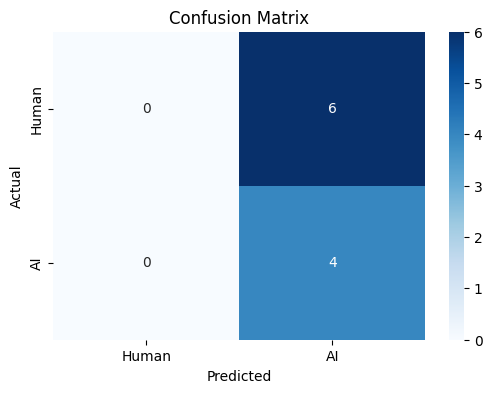

In [ ]:
X_test = tfidf.transform(test_df['text']).toarray()        # Transform testing text into TF-IDF features
y_test = test_df['label']
# Predictions
y_pred = xgb_clf.predict(X_test)
y_proba = xgb_clf.predict_proba(X_test)[:, 1]

# Evaluation
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
new_sample = ["""In the pitch-black depths of the ocean, where sunlight never reaches, an extraordinary light show unfolds. Deep-sea creatures have evolved the remarkable ability
to produce their own light through a chemical process called bioluminescence. From the anglerfish with its glowing lure to the countless specks of light from tiny dinoflagellates,
roughly 90% of marine life in the mesopelagic zone can generate this living light. Some use it to attract prey, others to confuse predators, and still others to find mates in the
vast darkness. The variety of colors they produce—from electric blues to soft greens—creates a mesmerizing display that reminds us how nature continues to surprise and adapt in even
the most challenging environments."""]
new_sample_tfidf = tfidf.transform(new_sample).toarray()
sample_pred = xgb_clf.predict(new_sample_tfidf)
sample_proba = xgb_clf.predict_proba(new_sample_tfidf)[:, 1]
print(f"Predicted Label: {sample_pred[0]}")  # 1 for AI-generated, 0 for human-written
print(f"Predicted Probability of being AI-generated: {sample_proba[0]:.4f}")

Predicted Label: 1
Predicted Probability of being AI-generated: 0.7000


# Implementing XAI using Shap

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(xgb_clf)

In [ ]:
sample_tfidf = TfidfVectorizer(max_features=50)
sample_tfidf.fit(new_sample)

TfidfVectorizer(max_features=50)

SHAP Explanations:


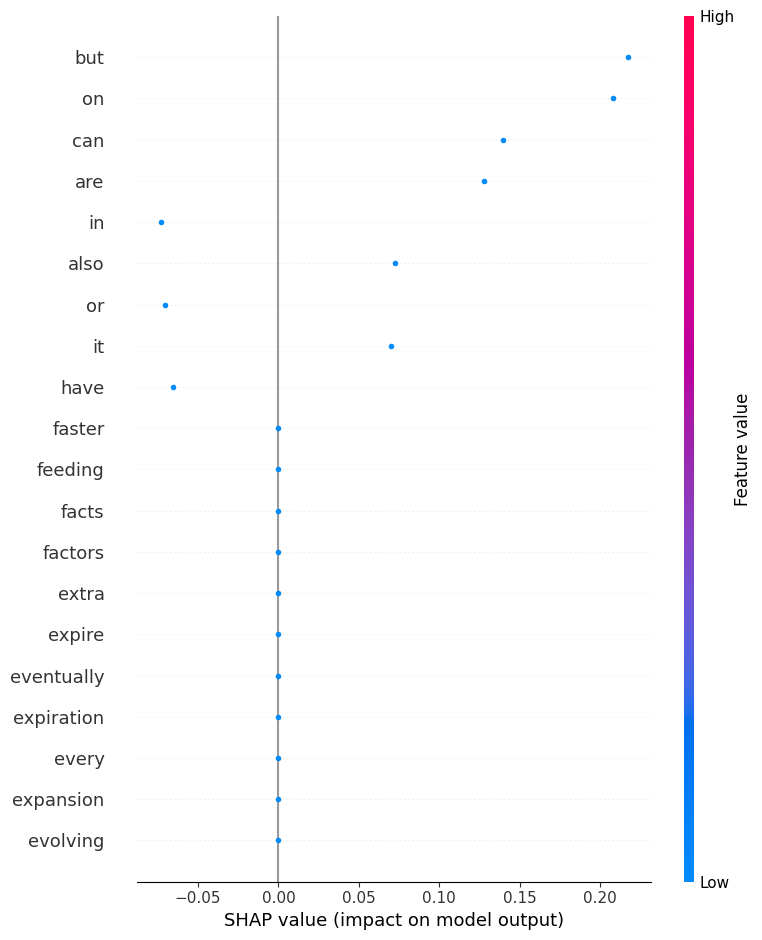

In [ ]:
print("SHAP Explanations:")

shap_values = explainer.shap_values(new_sample_tfidf)

# shap.force_plot(explainer.expected_value, shap_values[0], feature_names=tfidf.get_feature_names_out())

# Plotting SHAP summary (feature importance)
shap.summary_plot(shap_values, new_sample_tfidf, feature_names=tfidf.get_feature_names_out())


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Shap score of sentence as a unit

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
sentences = sent_tokenize(new_sample[0])

In [ ]:
sentence_embeddings = np.array([get_sentence_embedding(sentence) for sentence in sentences])

In [ ]:
def model_predict(embeddings):
    """Predict probabilities using the trained XGBClassifier."""
    n_features_expected = xgb_clf.n_features_in_
    if embeddings.shape[1] != n_features_expected:
        # Adjust PCA to keep fewer components
        n_components = min(n_features_expected, embeddings.shape[0], embeddings.shape[1])  # Include embeddings.shape[0] in min
        pca = PCA(n_components=n_components)
        embeddings = pca.fit_transform(embeddings)

        # If n_components is still less than expected, pad with zeros
        if embeddings.shape[1] < n_features_expected:
            padding_shape = (embeddings.shape[0], n_features_expected - embeddings.shape[1])
            padding = np.zeros(padding_shape)
            embeddings = np.concatenate([embeddings, padding], axis=1)

    return xgb_clf.predict_proba(embeddings)[:, 1]

In [ ]:
explainer = shap.KernelExplainer(model_predict, sentence_embeddings)
shap_values = explainer.shap_values(sentence_embeddings)

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2300: Runti

In [ ]:
for i, sentence in enumerate(sentences):
    print(f"Sentence {i + 1}: {sentence}")
    print(f"SHAP Values: {shap_values[i]}\n")

Sentence 1: In the pitch-black depths of the ocean, where sunlight never reaches, an extraordinary light show unfolds.
SHAP Values: [ 0.00000000e+00  0.00000000e+00 -1.26941268e-03  1.40717541e-03
  0.00000000e+00  0.00000000e+00 -1.55090608e-03 -1.68346274e-04
  2.59585278e-03  2.82936788e-03  0.00000000e+00  2.22667655e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.83788366e-03
  6.33204436e-03  0.00000000e+00 -1.47281710e-04  0.00000000e+00
  1.43584316e-03  2.40682230e-03  0.00000000e+00 -2.34585547e-03
  9.68500753e-04  1.20084862e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.99638934e-03  0.00000000e+00 -8.18493941e-04
  0.00000000e+00 -1.01936164e-03 -4.20988999e-04  0.00000000e+00
  0.00000000e+00 -1.96675418e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.25294891e-03  0.00000000e+00
  1.27786900e-03  0.00000000e+00  0.00000000e+00  1.08054435e-03
 -2.03273864e-03 -6.88494375e-03  0.00000000e+00  0.00000000e+00
 -1.55523245e-04  0.000

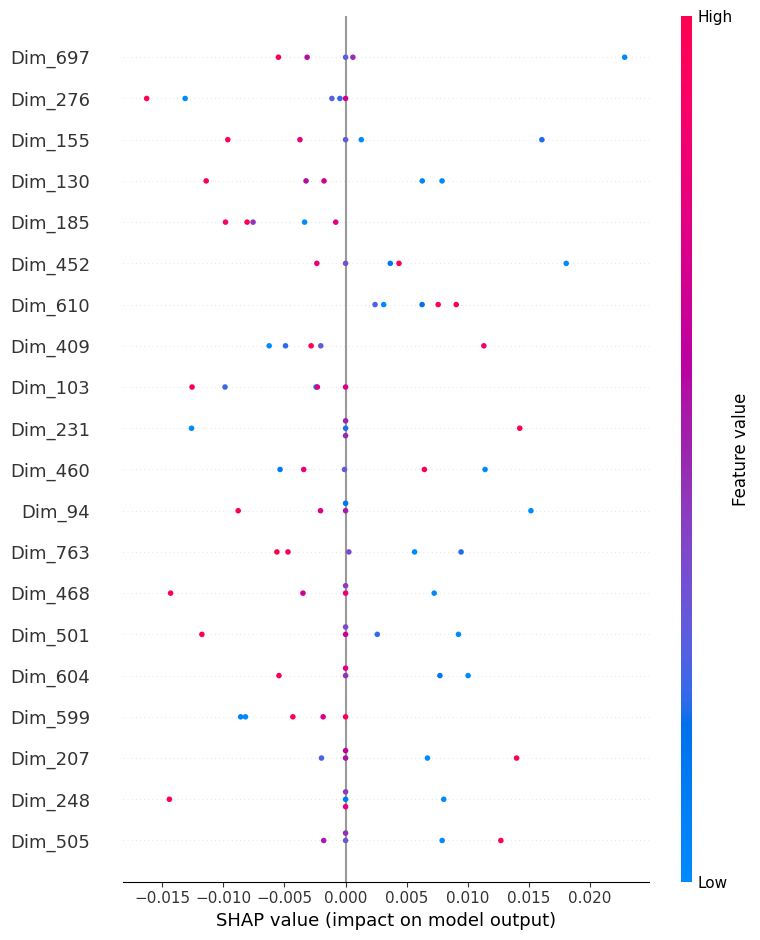

In [ ]:
shap.summary_plot(shap_values, sentence_embeddings, feature_names=[f"Dim_{j}" for j in range(sentence_embeddings.shape[1])])

In [ ]:
import matplotlib.pyplot as plt
import shap

# Bar plot for SHAP values of each sentence
for i, (sentence, shap_value) in enumerate(zip(sentences, shap_values)):
    print(f"Sentence {i + 1}: {sentence}\n")

    # Reshape shap_value to (1, num_features)
    shap_value_reshaped = shap_value.reshape(1, -1)

    # Reshape features to (1, num_features)
    features_reshaped = sentence_embeddings[i].reshape(1, -1)

    # Bar plot
    shap.summary_plot(
        shap_values=shap_value_reshaped,
        features=features_reshaped,
        feature_names=[f"Dim_{j}" for j in range(sentence_embeddings.shape[1])],
        plot_type="bar",
        max_display=10,  # Show top 10 important features
        show=False
    )
    plt.title(f"SHAP Bar Plot for Sentence {i + 1}")
    plt.show()

In [ ]:
abs_shap_values = np.abs(shap_values)

min_impact = np.min(sentence_impact)
max_impact = np.max(sentence_impact)

normalized_sentence_impact = (sentence_impact - min_impact) / (max_impact - min_impact)

sentence_impact = np.sum(abs_shap_values, axis=1)

sentence_impact_sorted = sorted(zip(normalized_sentence_impact, sentences), reverse=True)

In [ ]:
print("Sentence Impact Ranking (Most Impactful Sentence First):")
for impact, sentence in sentence_impact_sorted:
    print(f"Impact: {impact:.4f} | Sentence: {sentence}")

Sentence Impact Ranking (Most Impactful Sentence First):
Impact: 1.0000 | Sentence: Some use it to attract prey, others to confuse predators, and still others to find mates in the
vast darkness.
Impact: 0.7516 | Sentence: Deep-sea creatures have evolved the remarkable ability
to produce their own light through a chemical process called bioluminescence.
Impact: 0.5442 | Sentence: The variety of colors they produce—from electric blues to soft greens—creates a mesmerizing display that reminds us how nature continues to surprise and adapt in even
the most challenging environments.
Impact: 0.5402 | Sentence: In the pitch-black depths of the ocean, where sunlight never reaches, an extraordinary light show unfolds.
Impact: 0.0000 | Sentence: From the anglerfish with its glowing lure to the countless specks of light from tiny dinoflagellates,
roughly 90% of marine life in the mesopelagic zone can generate this living light.


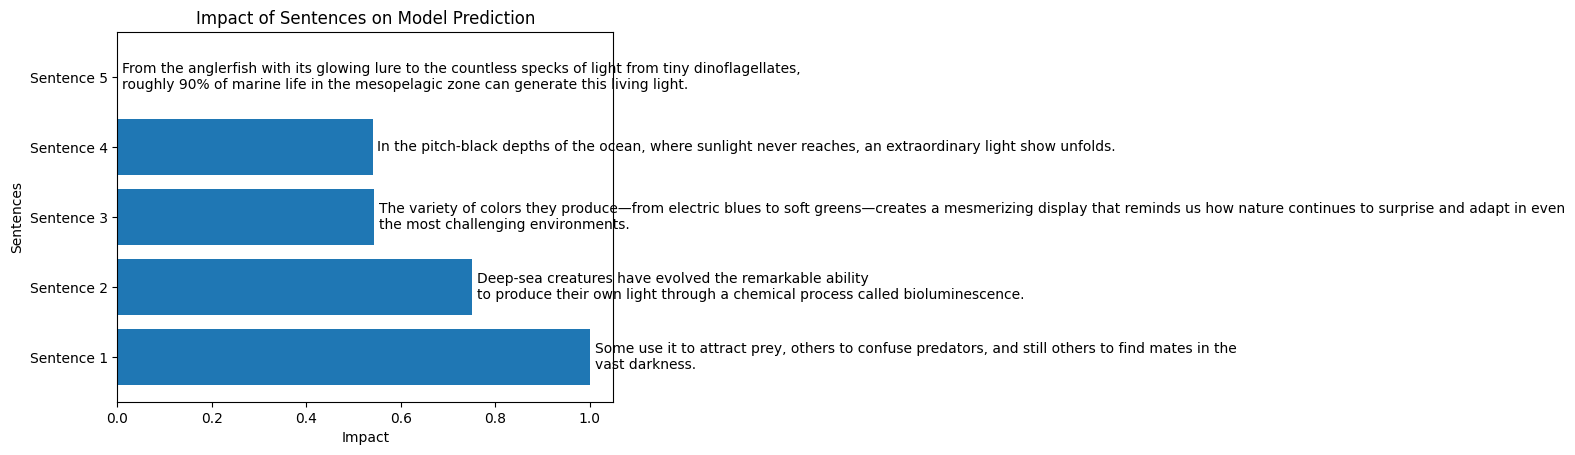

In [ ]:
sentence_labels = [f"Sentence {i + 1}" for i in range(len(sentences))]
impact_values = [impact for impact, _ in sentence_impact_sorted]
plt.barh(sentence_labels, impact_values)

# Add sentence text as labels to the bars
for i, (impact, sentence) in enumerate(sentence_impact_sorted):
    plt.text(impact + 0.01, i, sentence, va='center')  # Adjust 0.01 for spacing

plt.xlabel('Impact')
plt.ylabel('Sentences')
plt.title('Impact of Sentences on Model Prediction')
plt.show()

# Shap score by add score of each words

In [ ]:
sentences = sent_tokenize(new_sample[0])
sentence_vectors = tfidf.transform(sentences).toarray()

# SHAP values for each sentence
shap_values_sentences = [explainer.shap_values(vec.reshape(1, -1)) for vec in sentence_vectors]

# Aggregate SHAP values for each sentence
sentence_scores = [np.sum(np.abs(values)) for values in shap_values_sentences]

for sentence, score in zip(sentences, sentence_scores):
    print(f"Sentence: {sentence}\nSHAP Contribution Score: {score}\n")

Sentence: In the pitch-black depths of the ocean, where sunlight never reaches, an extraordinary light show unfolds.
SHAP Contribution Score: 1.0430123805999756

Sentence: Deep-sea creatures have evolved the remarkable ability 
to produce their own light through a chemical process called bioluminescence.
SHAP Contribution Score: 1.0455646514892578

Sentence: From the anglerfish with its glowing lure to the countless specks of light from tiny dinoflagellates, 
roughly 90% of marine life in the mesopelagic zone can generate this living light.
SHAP Contribution Score: 1.0424059629440308

Sentence: Some use it to attract prey, others to confuse predators, and still others to find mates in the 
vast darkness.
SHAP Contribution Score: 1.043039083480835

Sentence: The variety of colors they produce—from electric blues to soft greens—creates a mesmerizing display that reminds us how nature continues to surprise and adapt in even 
the most challenging environments.
SHAP Contribution Score: 1.04

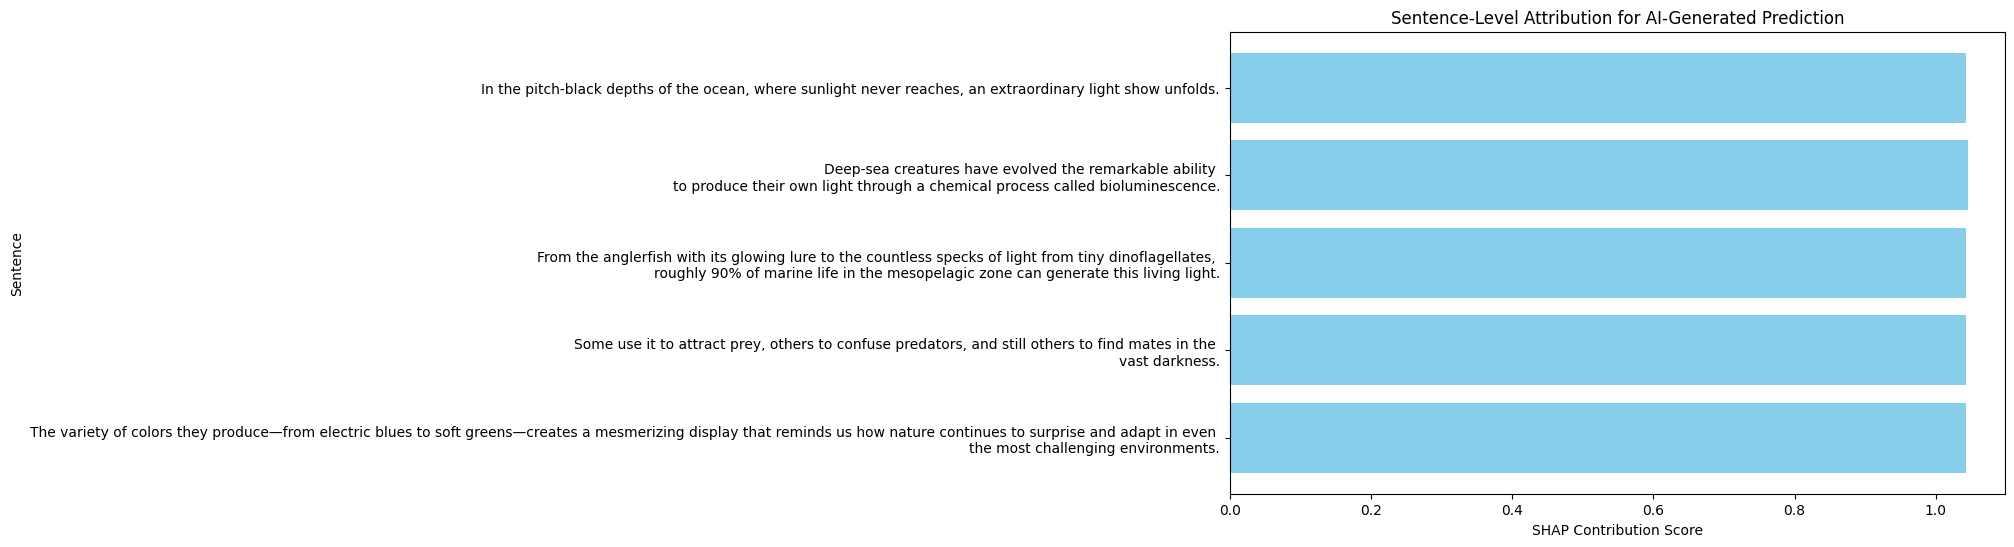

In [ ]:
import matplotlib.pyplot as plt

# Plot SHAP contributions for sentences
plt.figure(figsize=(10, 6))
plt.barh(sentences, sentence_scores, color='skyblue')
plt.xlabel('SHAP Contribution Score')
plt.ylabel('Sentence')
plt.title('Sentence-Level Attribution for AI-Generated Prediction')
plt.gca().invert_yaxis()
plt.show()

# Function for XAI


In [ ]:
def XAI_Reasoning(new_sample):
  new_sample_tfidf = tfidf.transform(new_sample).toarray()
  sample_pred = xgb_clf.predict(new_sample_tfidf)
  sample_proba = xgb_clf.predict_proba(new_sample_tfidf)[:, 1]
  print(f"Predicted Label: {sample_pred[0]}")  # 1 for AI-generated, 0 for human-written
  print(f"Predicted Probability of being AI-generated: {sample_proba[0]:.4f}")

  print("SHAP Explanations:")

  sentences = sent_tokenize(new_sample[0])

  sentence_embeddings = np.array([get_sentence_embedding(sentence) for sentence in sentences])

  explainer = shap.KernelExplainer(model_predict, sentence_embeddings)
  shap_values = explainer.shap_values(sentence_embeddings)

  abs_shap_values = np.abs(shap_values)

  sentence_impact = np.sum(abs_shap_values, axis=1)

  min_impact = np.min(sentence_impact)
  max_impact = np.max(sentence_impact)

  normalized_sentence_impact = (sentence_impact - min_impact) / (max_impact - min_impact)

  sentence_impact = np.sum(abs_shap_values, axis=1)

  sentence_impact_sorted = sorted(zip(normalized_sentence_impact, sentences), reverse=True)

  print("Sentence Impact Ranking (Most Impactful Sentence First):")
  for impact, sentence in sentence_impact_sorted:
      print(f"Impact: {impact:.4f} | Sentence: {sentence}")

  sentence_labels = [f"Sentence {i + 1}" for i in range(len(sentences))]
  impact_values = [impact for impact, _ in sentence_impact_sorted]
  plt.barh(sentence_labels, impact_values)

  # Add sentence text as labels to the bars
  for i, (impact, sentence) in enumerate(sentence_impact_sorted):
      plt.text(impact + 0.01, i, sentence, va='center')  # Adjust 0.01 for spacing

  plt.xlabel('Impact')
  plt.ylabel('Sentences')
  plt.title('Impact of Sentences on Model Prediction')
  plt.show()

Predicted Label: 1
Predicted Probability of being AI-generated: 0.7019
SHAP Explanations:


  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:591: RuntimeWarning: invalid value encountered in 

Sentence Impact Ranking (Most Impactful Sentence First):
Impact: 1.0000 | Sentence: She eats a large amount of food at one time.
Impact: 0.6258 | Sentence: She has given the status of Mother in Hindu society and also called “Gau Mata.”
Impact: 0.3694 | Sentence: She gives us milk to make 
us healthy and strong.
Impact: 0.3083 | Sentence: It keeps us away from diseases and infections by increasing our immunity power.
Impact: 0.2687 | Sentence: It is a four-footed female animal having a large body, 
two horns, two eyes, two ears, one nose, one mouth, one head, a big back, and also a stomach.
Impact: 0.2305 | Sentence: A successful domestic animal kept by people at home for many purposes.
Impact: 0.1145 | Sentence: 
The Cow is a very useful pet animal.
Impact: 0.0000 | Sentence: She is a sacred animal and worshipped in India like a Goddess.


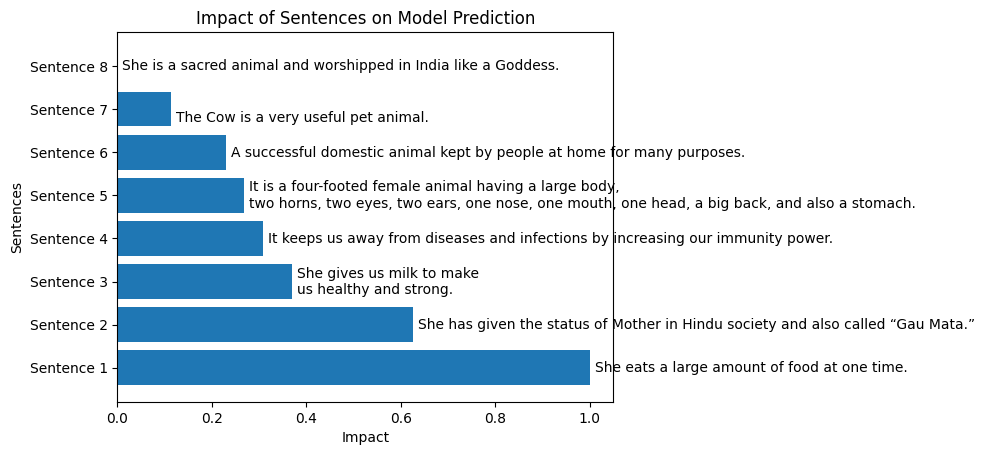

In [ ]:
text = ["""
The Cow is a very useful pet animal. A successful domestic animal kept by people at home for many purposes. It is a four-footed female animal having a large body,
two horns, two eyes, two ears, one nose, one mouth, one head, a big back, and also a stomach. She eats a large amount of food at one time. She gives us milk to make
us healthy and strong. It keeps us away from diseases and infections by increasing our immunity power. She is a sacred animal and worshipped in India like a Goddess.
She has given the status of Mother in Hindu society and also called “Gau Mata.”
"""]

XAI_Reasoning(text)